In [9]:
import pandas as pd
import numpy as np
import random as rd
import datetime as dt
import matplotlib.pyplot as plt
import sys
import pyodbc as pyodbc
%pylab inline

sys.path.append('S:/Stoxx/Product Development and Research/Python')
sys.path.append('C:/Users/iv822/Documents/Python Scripts')
sys.path.append('S:/Stoxx/Product Development and Research/Team/Antonio/20171106')


import gdax
import json

import myfunctions as myf
import qadconnect34 as q

loc ='S:/Stoxx/Product Development and Research/Team/Antonio/20171106/'

Populating the interactive namespace from numpy and matplotlib


In [133]:
#auth_client.get_accounts()

In [182]:
public_client = gdax.PublicClient()
public_client.get_product_order_book('BTC-USD', level=1)

x = public_client.get_product_ticker(product_id='BTC-EUR')
public_client.get_products()

pd.DataFrame(list(x.items()))

,0,1
0,volume,4056.86744844
1,price,5915.00000000
2,bid,5914.99
3,time,2017-11-10T16:00:45.430000Z
4,trade_id,5179242
5,size,0.20000000
6,ask,5915


In [119]:
public_client = gdax.PublicClient()
public_client.get_product_order_book('BTC-USD', level=2)
x = public_client.get_product_ticker(product_id='ETH-USD')
public_client.get_products()

pd.DataFrame(list(x.items()))

,0,1
0,volume,145528.64945916
1,price,305.70000000
2,bid,305.7
3,time,2017-11-10T15:15:43.160000Z
4,trade_id,14675810
5,size,16.43842751
6,ask,305.72


In [185]:
x = public_client.get_product_order_book('BTC-EUR', level=3)
#pd.DataFrame(list(x.items()))
print(public_client.get_time())
#pd.DataFrame.from_dict(x).head(20)
x['asks']

def aggr_order_book3(x):
    

{'epoch': 1510329805.685, 'iso': '2017-11-10T16:03:25.685Z'}


{'asks': [['5978.25', '0.48', '31a87e37-9ee2-48f0-b127-f81a0cd2ad22'],
  ['5978.25', '0.01', '2e6b48f2-1fc5-41fa-8cb5-b1d64354f2c6'],
  ['5978.26', '0.03455', 'ddbbced5-5a4b-458c-a355-57e65580ab51'],
  ['5978.3', '0.0195', '6dc1b46c-3f66-4d2a-a494-af0601f02a44'],
  ['5978.44', '0.1', '6befba6b-e979-4b66-8ab7-ff1d07f7f372'],
  ['5979.8', '0.05', 'a7819d82-18c8-491c-b9d1-03b96b5d1f0b'],
  ['5980', '0.3', '52750ec8-6836-4cdb-9241-b4b0ff37963f'],
  ['5982.07', '0.52', '9311bd5a-ae26-4952-b314-5bda1d2c1b77'],
  ['5982.08', '0.822', '96d1a931-bdec-4856-9a62-d36a6c7ce700'],
  ['5989.09', '0.52', '84bd695b-0d97-4a1b-8e52-44bc93d07640'],
  ['5989.1', '0.8', '71a2f482-e95b-42e8-901d-b323db6c6ac1'],
  ['5989.34', '0.03', 'b90bdac7-6b27-4616-a4f2-c21b1ae1288e'],
  ['5989.37', '0.04', '476f0958-57d0-49a6-8538-c26eb9cb371e'],
  ['5989.4', '0.06', 'eed794c8-91a1-4484-a410-4cad0057c5eb'],
  ['5989.42', '0.06', 'ba37501e-9ac3-45bb-8910-20ddaec3b2f3'],
  ['5989.45', '0.033', 'b3ec96ba-a866-4c88-9ec8-655

In [184]:
x = public_client.get_product_order_book('BTC-EUR', level=2)
#pd.DataFrame(list(x.items()))
print(public_client.get_time())
#pd.DataFrame.from_dict(x)

ask=pd.DataFrame(x['asks'], columns=['ask_price','ask_size','ask_num'])
bid=pd.DataFrame(x['bids'], columns=['bid_price','bid_size','bid_num'])

pd.concat([ask, bid], axis=1)

{'epoch': 1510329734.892, 'iso': '2017-11-10T16:02:14.892Z'}


,ask_price,ask_size,ask_num,bid_price,bid_size,bid_num
0,5950,1.39446087,2,5949.99,5.96066455,12
1,5950.28,0.1,1,5949.88,0.02,1
2,5953,0.01,1,5949.69,0.05,1
3,5953.01,0.01,1,5949.5,0.92256052,1
4,5955,0.01427558,1,5949.01,0.02,1
5,5955.68,0.44406,1,5949,0.5,1
6,5960,0.0419462,1,5946.04,0.02,1
7,5966.2,0.01,1,5946.03,0.52,1
8,5966.62,0.21,1,5945.99,0.26096846,2
9,5966.65,0.2,1,5939.99,0.52,1


In [169]:
y = public_client.get_product_trades(product_id='BTC-EUR')

pd.DataFrame.from_dict(y).head()


,price,side,size,time,trade_id
0,5900.00000000,sell,0.00010144,2017-11-10T15:55:13.806Z,5179023
1,5900.00000000,sell,0.01000000,2017-11-10T15:55:13.353Z,5179022
2,5900.00000000,sell,0.03000000,2017-11-10T15:55:10.31Z,5179021
3,5900.00000000,sell,0.08000000,2017-11-10T15:55:04.895Z,5179020
4,5900.00000000,sell,0.03000000,2017-11-10T15:55:04.205Z,5179019


(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.]),
 <a list of 9 Text xticklabel objects>)

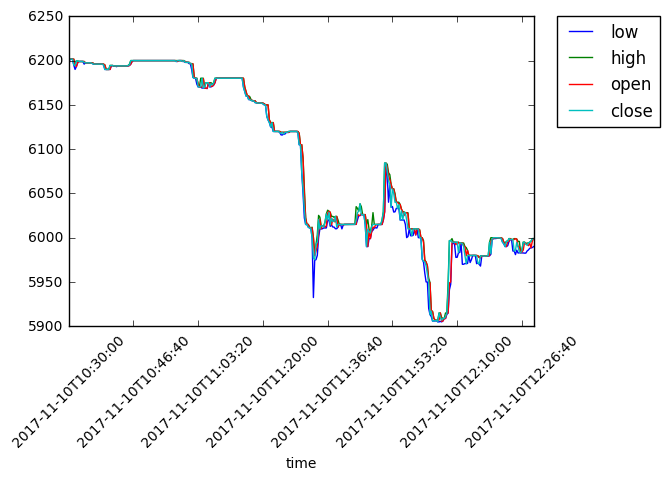

In [129]:
import datetime as DT

z = public_client.get_product_historic_rates('BTC-EUR', 
                                             start='2017-11-10T10:30:00Z', 
                                             end='2017-11-10T12:30:00Z',
                                             granularity=20)

#z = public_client.get_product_historic_rates('BTC-EUR')
dfh = pd.DataFrame(z, columns=['time','low','high','open','close','volume'])
dfh['time'] = dfh['time'].map(lambda x: DT.datetime.utcfromtimestamp(x).isoformat())
dfh.index = dfh['time']
dfh = dfh.sort_values('time')
dfh[[1,2,3,4]].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [85]:
t = public_client.get_time()
dft = pd.DataFrame(list(t.items()))
dft

,0,1
0,epoch,1.51033e+09
1,iso,2017-11-10T14:53:19.306Z
